In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
data=pd.read_excel('/home/shiyas/Desktop/My Project/Machine Learning/Data.xlsx')

In [156]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [158]:
#Airline vs Price
data.groupby('Airline')['Price'].max().sort_values(ascending=False)

Airline
Jet Airways Business                 79512
Jet Airways                          54826
Multiple carriers                    36983
Air India                            31945
SpiceJet                             23267
GoAir                                22794
IndiGo                               22153
Vistara                              21730
Multiple carriers Premium economy    14629
Air Asia                             13774
Vistara Premium economy              11793
Trujet                                4140
Name: Price, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

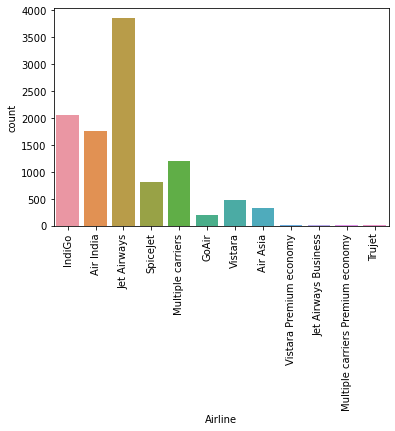

In [159]:
#count of the airlines in graph
plot=plt.figure()
sns.countplot('Airline',data= data)
plt.xticks(rotation=90)



(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

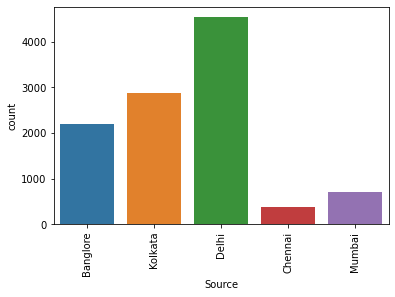

In [160]:
#count of Source 
plot=plt.figure()
sns.countplot('Source',data= data)
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

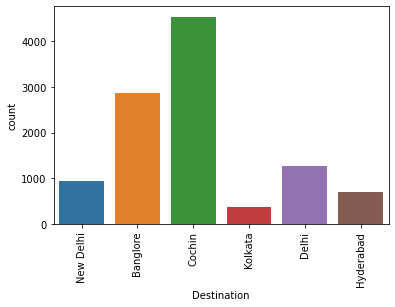

In [161]:
#count of Destinations
plot=plt.figure()
sns.countplot('Destination',data= data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

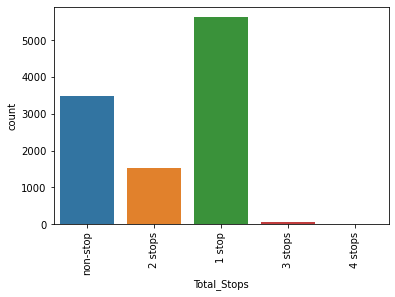

In [9]:
#count of Total stops
plot=plt.figure()
sns.countplot('Total_Stops',data= data)
plt.xticks(rotation=90)

In [10]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [11]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [12]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [13]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
data.dropna(inplace=True)

In [15]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [16]:
data.shape

(10682, 11)

In [17]:
# Date_of_Journey is object data type, Therefore, we have to convert this datatype into timestamp.
# we use to_datetime

In [18]:
data["Journey_day"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [19]:
data["journey_month"]=pd.to_datetime(data.Date_of_Journey,format="%d/%m/%Y").dt.month

In [20]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [21]:
data.drop(['Date_of_Journey'], axis=1, inplace=True)

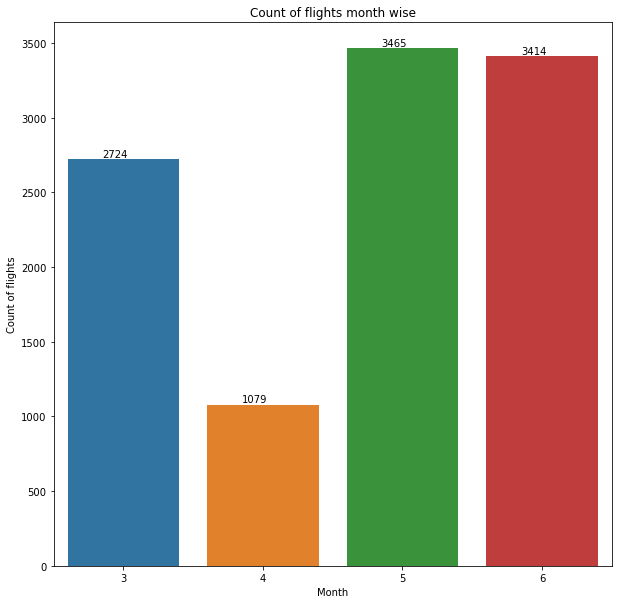

In [22]:
#count of flights month wise


plt.figure(figsize = (10, 10))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'journey_month', data = data)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')


In [23]:
# Dep_Time is object data type, Therefore, we have to convert this datatype into timestamp.

In [24]:
data['departure_hour']=pd.to_datetime(data.Dep_Time).dt.hour

In [25]:
data['departure_minutes']=pd.to_datetime(data.Dep_Time).dt.minute

In [26]:
data.drop(['Dep_Time'],axis=1, inplace=True)

In [27]:
data

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,journey_month,departure_hour,departure_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [28]:
#same as Date_of_journey,we can extract both hour and minute features from arrival time

data['arrival_hour']=pd.to_datetime(data.Arrival_Time).dt.hour
data['arrival_minutes']=pd.to_datetime(data.Arrival_Time).dt.minute

In [29]:
#dropping arrival_time from data
data.drop(['Arrival_Time'],axis=1,inplace=True)

In [30]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,journey_month,departure_hour,departure_minutes,arrival_hour,arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [31]:
# Duration is the difference b/w the departure time and Ariival time
# Assigning and converting Duration column into list

duration = list(data['Duration'])

In [32]:

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
            


In [33]:
# Adding duration_hours and duration_mins list to data 

data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

In [34]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,journey_month,departure_hour,departure_minutes,arrival_hour,arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [35]:
data.drop(['Duration'],axis=1,inplace=True)

# Categorical Data Handling...



In [36]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

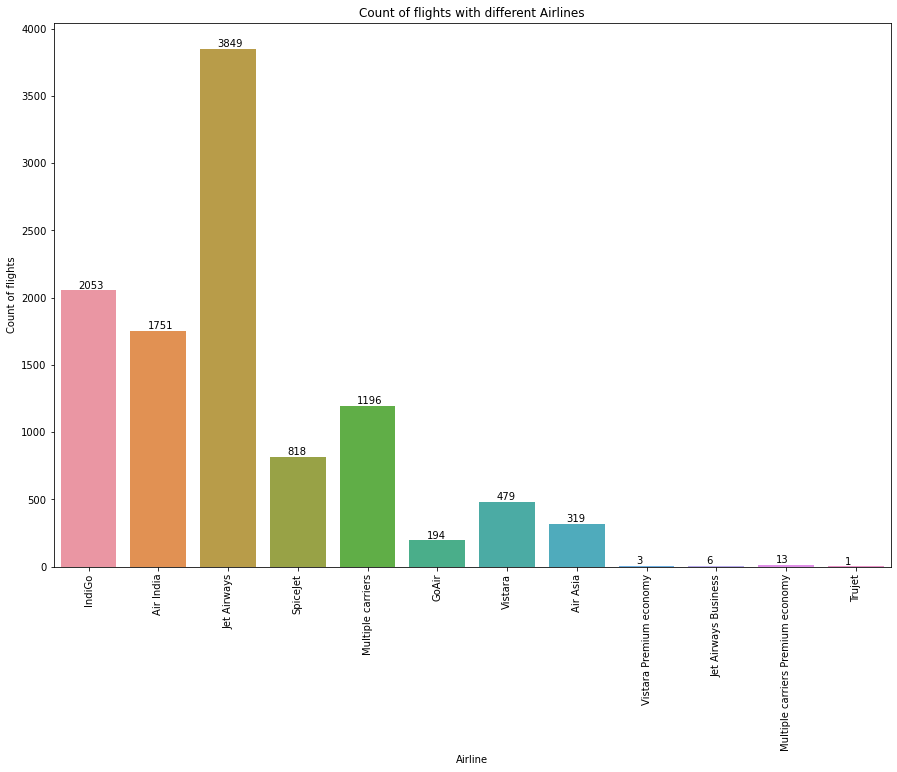

In [37]:
#count of flights 

plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data = data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')



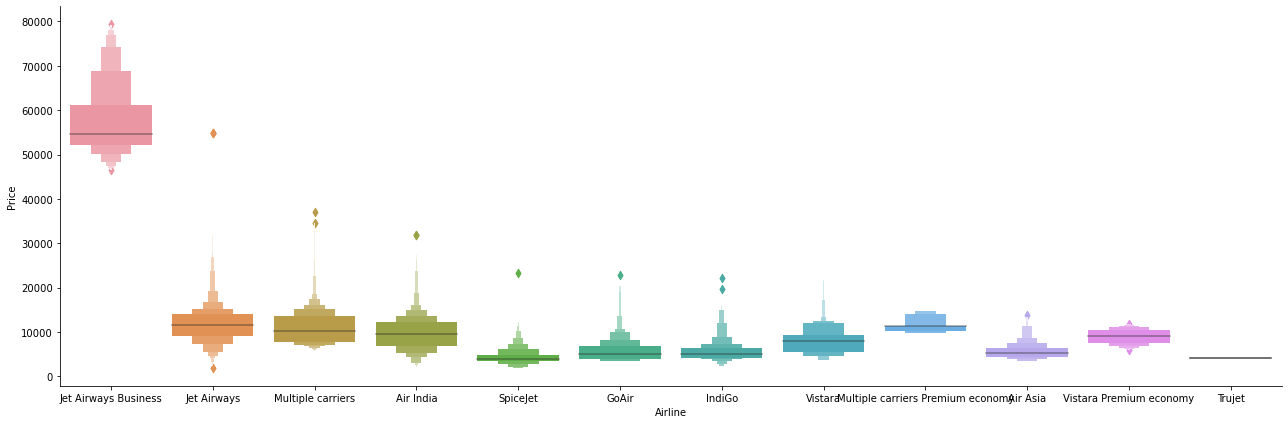

In [38]:
#Airline vs Price by using catplot
sns.catplot(y="Price", x="Airline", data=data.sort_values("Price", ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [39]:
#we need to perform One-Hot Encoding for Airline categorical data

Airline=data[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)

In [40]:
Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [41]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

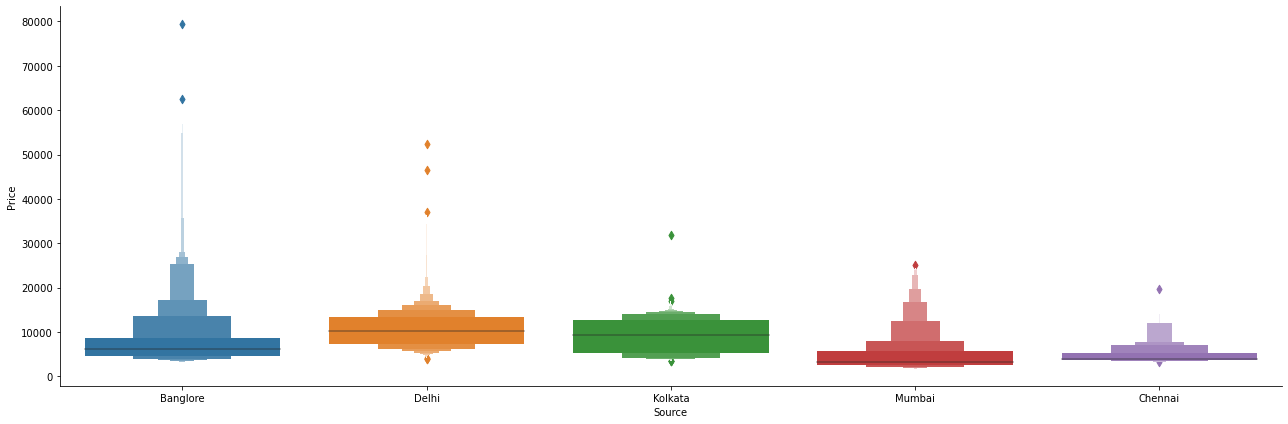

In [42]:
# Source vs Price 
sns.catplot(y="Price",x="Source", data=data.sort_values("Price",ascending=False),kind="boxen",height=6, aspect=3)
plt.show()

In [43]:
#we need to perform One-Hot Encoding for Source categorical data

Source=data[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [44]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

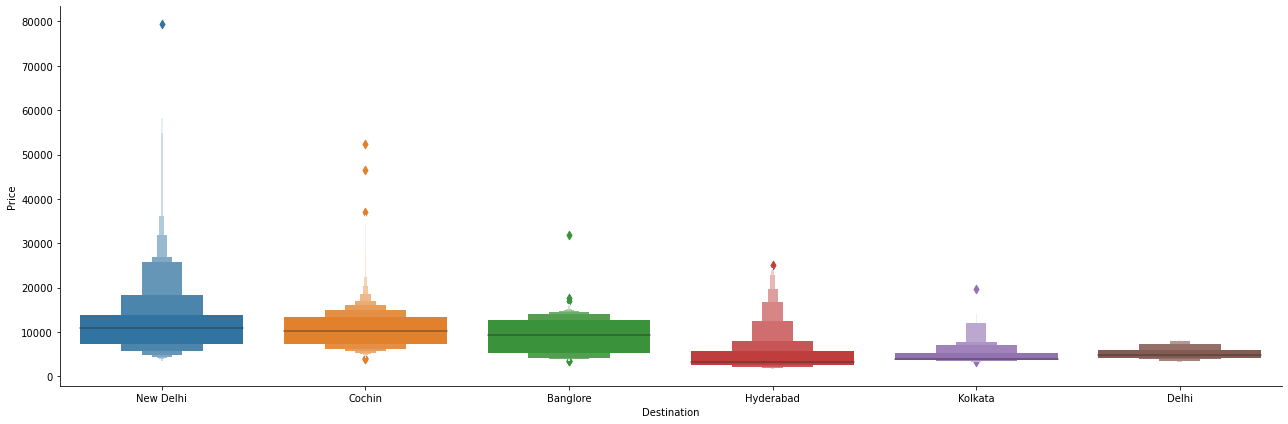

In [45]:
# Destination vs Price
sns.catplot(y="Price",x="Destination",data=data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [46]:
#we need to perform One-Hot Encoding for Destination categorical data

Destination=data[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [47]:
data['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
CCU → IXB → DEL → BLR             1
BLR → HBX → BOM → BHO → DEL       1
BOM → JAI → DEL → HYD             1
BOM → NDC → HYD                   1
BOM → UDR → DEL → HYD             1
Name: Route, Length: 128, dtype: int64

In [48]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [49]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other ,  so we can drop Additional_info and Route

data.drop(['Additional_Info','Route'],axis=1, inplace=True)

In [50]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,journey_month,departure_hour,departure_minutes,arrival_hour,arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [51]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [52]:
# Here,we need to perform LabelEncoder
# Here Values are assigned with corresponding keys
data.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3,'4 stops':4 },inplace=True)


In [53]:
data

,Airline,Source,Destination,Total_Stops,Price,Journey_day,journey_month,departure_hour,departure_minutes,arrival_hour,arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40


In [54]:
#concatenate data frames >> data + Airline + Source + Destination
data = pd.concat([data,Airline,Source,Destination],axis=1)

In [55]:
data

,Airline,Source,Destination,Total_Stops,Price,Journey_day,journey_month,departure_hour,departure_minutes,arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,...,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,...,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,...,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,...,0,0,0,0,0,0,0,0,0,1


In [56]:
data.drop(['Airline','Source','Destination'],axis=1, inplace=True)

In [57]:
data.shape

(10682, 30)

In [58]:
data.dtypes

Total_Stops                                  int64
Price                                        int64
Journey_day                                  int64
journey_month                                int64
departure_hour                               int64
departure_minutes                            int64
arrival_hour                                 int64
arrival_minutes                              int64
Duration_hours                               int64
Duration_mins                                int64
Airline_Air India                            uint8
Airline_GoAir                                uint8
Airline_IndiGo                               uint8
Airline_Jet Airways                          uint8
Airline_Jet Airways Business                 uint8
Airline_Multiple carriers                    uint8
Airline_Multiple carriers Premium economy    uint8
Airline_SpiceJet                             uint8
Airline_Trujet                               uint8
Airline_Vistara                

In [59]:
data.shape

(10682, 30)

# Feature Selection

In [60]:
data.shape

(10682, 30)

In [61]:
data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'journey_month',
       'departure_hour', 'departure_minutes', 'arrival_hour',
       'arrival_minutes', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [62]:
x = data.drop(['Price'],axis=1)
y = data['Price']

In [63]:
x.head()

,Total_Stops,Journey_day,journey_month,departure_hour,departure_minutes,arrival_hour,arrival_minutes,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

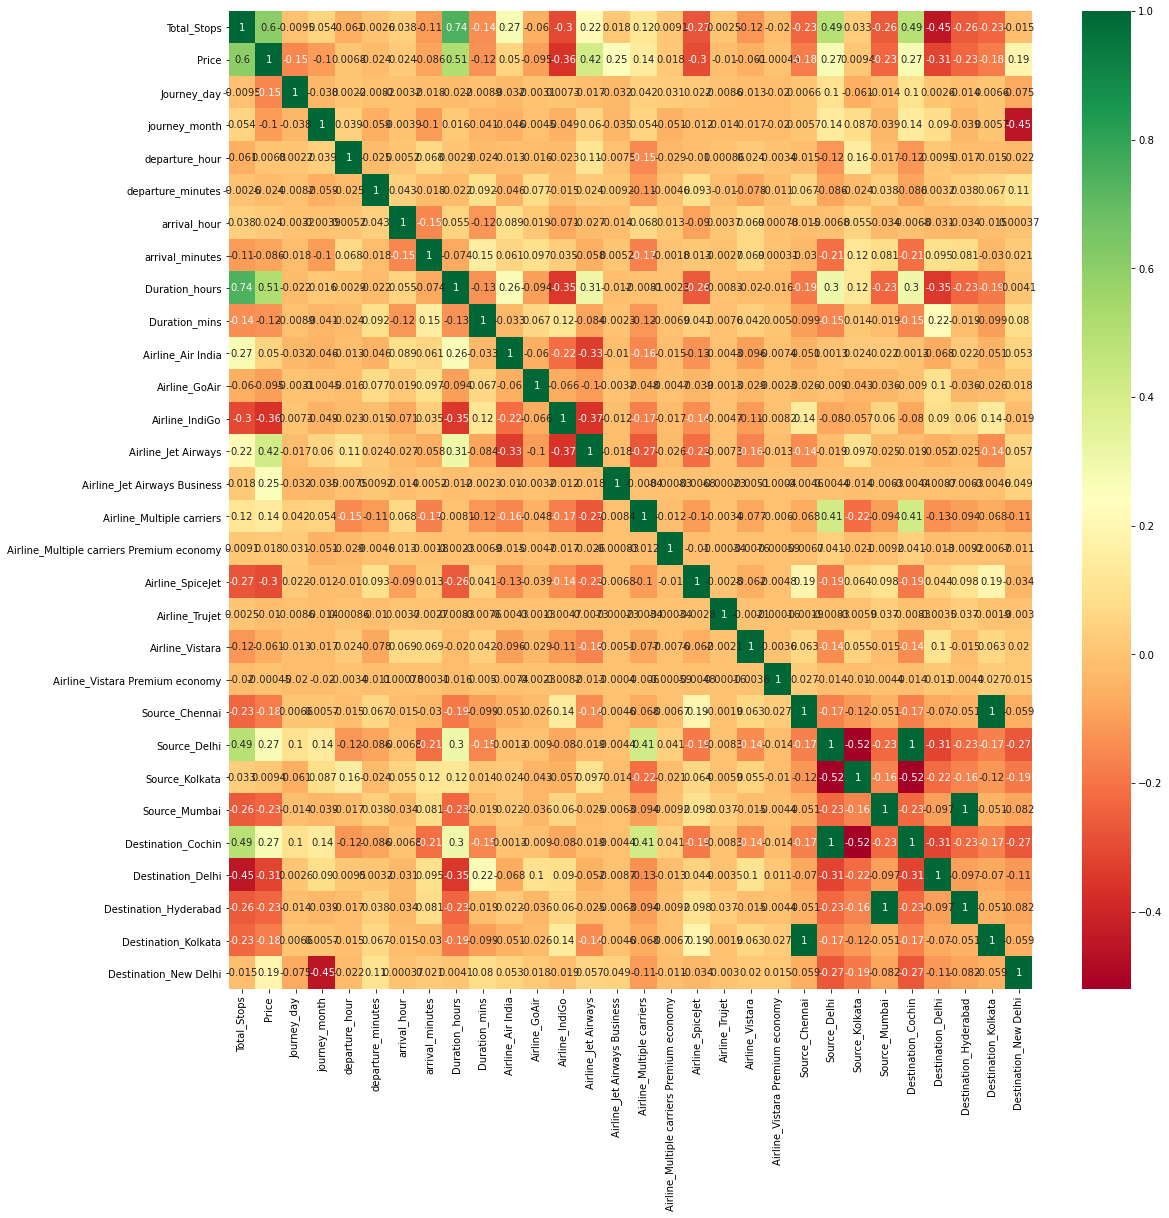

In [65]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [66]:
data.corr()

,Total_Stops,Price,Journey_day,journey_month,departure_hour,departure_minutes,arrival_hour,arrival_minutes,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706,...,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,...,-0.000454,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
Journey_day,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940,...,-0.020115,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
journey_month,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897,...,-0.019797,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
departure_hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,...,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
departure_minutes,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,...,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
arrival_hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,...,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
arrival_minutes,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,...,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271
Duration_hours,0.739916,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,...,-0.016268,-0.186668,0.299819,0.123524,-0.233326,0.299819,-0.346192,-0.233326,-0.186668,0.004052
Duration_mins,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000,...,0.004952,-0.098823,-0.154126,0.013761,-0.018761,-0.154126,0.218207,-0.018761,-0.098823,0.079866


In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [68]:
x_train.shape

(8545, 29)

In [69]:
x_test.shape

(2137, 29)

In [70]:
y_train.shape

(8545,)

In [71]:
y_test.shape

(2137,)

# 1 . Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression  #importing LinearRegression from sklearn within the class linear_model

In [73]:
lin_reg = LinearRegression() #creating object of LinearRegression

In [74]:
lin_reg.fit(x_train,y_train) #training and fitting LR object using training data

LinearRegression()

In [75]:
m=lin_reg.coef_
m

array([ 2.75697935e+03, -7.24895798e+01, -4.25346169e+02,  2.02523760e+01,
       -2.16957940e+00, -1.16972061e+01,  2.20836501e+00,  2.58973394e+00,
       -1.90203371e+00,  1.65862906e+03,  2.02272697e+02,  2.28394109e+02,
        4.36753447e+03,  4.77518757e+04,  3.70553088e+03,  4.06229450e+03,
       -2.47404824e+02, -2.68126424e+03,  2.07774779e+03,  3.07890247e+03,
        8.54374329e+00,  5.69885538e+01,  6.80900407e+00, -8.22250398e+02,
        5.69885538e+01, -8.35738549e+02, -8.22250398e+02,  8.54374329e+00,
        1.58564765e+03])

In [76]:
c=lin_reg.intercept_
c

7331.077987909261

In [77]:
ypred_linear=lin_reg.predict(x_test)

In [78]:
ypred_linear

array([13341.37063241,  7639.70333212,  9606.38525413, ...,
        6777.87421139, 11226.03653127, 11576.90096225])

In [79]:
from sklearn.metrics import mean_squared_error #calculating MSE
MSE_linear=mean_squared_error(ypred_linear,y_test)
print("MSE for Testing:",MSE_linear)

MSE for Testing: 8202327.557407132


In [80]:
#Training Error
y_pred_training = lin_reg.predict(x_train)
MSE_training=mean_squared_error(y_pred_training,y_train)
print("MSE for Training:",MSE_training)

MSE for Training: 7965492.818418414


In [81]:
delta = (MSE_linear-MSE_training)/MSE_training * 100
delta

2.9732590862562933

In [82]:
lin_reg.score(x_train,y_train)  

0.6240840020468166

In [83]:
lin_reg.score(x_test,y_test)      

0.6195943729070101

In [84]:
from sklearn import metrics
MAE_linReg = metrics.mean_absolute_error(y_test, ypred_linear)
MSE_linReg = metrics.mean_squared_error(y_test, ypred_linear)
RMSE_linReg = np.sqrt(metrics.mean_squared_error(y_test, ypred_linear))

In [85]:
print('MAE_linReg:', metrics.mean_absolute_error(y_test, ypred_linear))
print('MSE_linReg:', metrics.mean_squared_error(y_test, ypred_linear))
print('RMSE_linReg:', np.sqrt(metrics.mean_squared_error(y_test, ypred_linear)))

MAE_linReg: 1972.9372855148047
MSE_linReg: 8202327.557407132
RMSE_linReg: 2863.9705929717807


In [86]:
#Model Acccuracy

from sklearn.metrics import r2_score                          
R2_linear = r2_score(y_test,ypred_linear)
R2_linear

0.6195943729070101

# 2 . Ridge

In [87]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [88]:
ypred_ridge = ridge.predict(x_test)

In [89]:
Ridge_Error =mean_squared_error(ypred_ridge,y_test)
Ridge_Error

8225153.769736515

In [90]:
MAE_Ridge = metrics.mean_absolute_error(y_test, ypred_ridge)
MSE_Ridge = metrics.mean_squared_error(y_test, ypred_ridge)
RMSE_Ridge = np.sqrt(metrics.mean_squared_error(y_test, ypred_ridge))

In [91]:
from sklearn.metrics import r2_score
R2_Ridge = r2_score(y_test, ypred_ridge)
R2_Ridge

0.6185357441757696

In [92]:
from sklearn.model_selection import GridSearchCV #this is used for hyper parameter tuning
from sklearn.linear_model import Ridge

alphavalues = [1e-15, 1e-13, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1, 5, 10, 20, 30, 50, 100] #there are 14 values

solvervalues =['auto','svd'] #there are 2 values

ridge = Ridge()

parameters = {'alpha': alphavalues, 'solver':solvervalues} #regularization parameter dict

ridge_regressor = GridSearchCV(ridge, parameters)  #ridge object and ridge parameters

ridge_regressor.fit(x_train, y_train)

/home/shiyas/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.64276e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/shiyas/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.6331e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/shiyas/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.68436e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/shiyas/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.64861e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/shiyas/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-06, 0.0001,
                                   0.01, 1, 5, 10, 20, 30, 50, 100],
                         'solver': ['auto', 'svd']})

In [93]:
ridge_regressor.best_estimator_

Ridge(alpha=1e-13)

In [94]:
ridge_regressor.score(x_train, y_train)  #R2 value

0.6240840020468166

In [95]:
ridge_regressor.best_params_

{'alpha': 1e-13, 'solver': 'auto'}

In [96]:
ridge=Ridge(alpha=1e-13,solver='auto')
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)

In [97]:
Ridge_Error=mean_squared_error(y_pred_ridge,y_test)
Ridge_Error

8202327.557407131

In [98]:
#After tuning
print('MAE_Ridge_:', metrics.mean_absolute_error(y_test, y_pred_ridge))
print('MSE_Ridge_:', metrics.mean_squared_error(y_test, y_pred_ridge))
print('RMSE_Ridge_:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))

MAE_Ridge_: 1972.9372855148042
MSE_Ridge_: 8202327.557407131
RMSE_Ridge_: 2863.97059297178


In [99]:
#Model Accuracy
from sklearn.metrics import r2_score
R2_Ridge_ = r2_score(y_test, y_pred_ridge)
R2_Ridge_

0.6195943729070101

#  3 . Lasso Regression

In [100]:
from sklearn.linear_model import Lasso

lasso = Lasso()

In [101]:
lasso.fit(x_train, y_train)
ypred_lasso = lasso.predict(x_test)


In [102]:
#MSE before tuning
LassError =mean_squared_error(y_test,ypred_lasso)
LassError

8214135.1847234685

In [103]:
#R2 score before tuning
from sklearn.metrics import r2_score
R2_Lasso = r2_score(y_test, ypred_lasso)
R2_Lasso

0.6190467615317858

In [104]:
#MSE ,MAE & RMSE before tuning
MAE_Lass = metrics.mean_absolute_error(y_test, ypred_lasso)
MSE_Lass = metrics.mean_squared_error(y_test, ypred_lasso)
RMSE_Lass = np.sqrt(metrics.mean_squared_error(y_test, ypred_lasso))


In [105]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,50,100,500,1000]}

lasso_regressor = GridSearchCV(lasso, parameters)

lasso_regressor.fit(x_train, y_train)

/home/shiyas/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28021945528.273582, tolerance: 14957436.669029886
  model = cd_fast.enet_coordinate_descent(
/home/shiyas/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28101006992.26446, tolerance: 14524321.248725966
  model = cd_fast.enet_coordinate_descent(
/home/shiyas/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26226693548.58582, tolerance: 14000811.456376169
  model = cd_fast.enet_coordinate_descent(
/home/shiyas/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordina

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 50, 100, 500, 1000]})

In [106]:
BP=lasso_regressor.best_params_
BP

{'alpha': 1}

In [107]:
lasso=Lasso(alpha = 1e-15)
lasso.fit(x_train,y_train)
y_pred_lasso=lasso.predict(x_test)

/home/shiyas/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33907781453.831905, tolerance: 18106474.984834827
  model = cd_fast.enet_coordinate_descent(


In [108]:
y_pred_lasso

array([13341.37063241,  7639.70333212,  9606.38525413, ...,
        6777.87421139, 11226.03653127, 11576.90096225])

In [109]:
Lasso_Error=mean_squared_error(y_pred_lasso,y_test)
Lasso_Error

8202327.557407134

In [110]:
lasso.score(x_test,y_test)

0.61959437290701

In [111]:
print('MAE_Lasso:', metrics.mean_absolute_error(y_test, y_pred_lasso))
print('MSE_Lasso:', metrics.mean_squared_error(y_test, y_pred_lasso))
print('RMSE_Lasso:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))

MAE_Lasso: 1972.9372855148056
MSE_Lasso: 8202327.557407134
RMSE_Lasso: 2863.9705929717807


In [112]:
#Model Accuracy

from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lasso)

0.61959437290701

# 4 . Random Forest Regression

In [113]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [114]:


y_pred = reg_rf.predict(x_test)



In [115]:
reg_rf.score(x_train, y_train)

0.9532498481338596

In [116]:
reg_rf.score(x_test, y_test)

0.7964759522413096

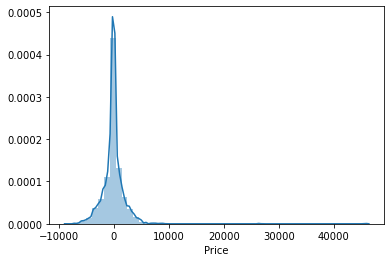

In [117]:
sns.distplot(y_test-y_pred)
plt.show()

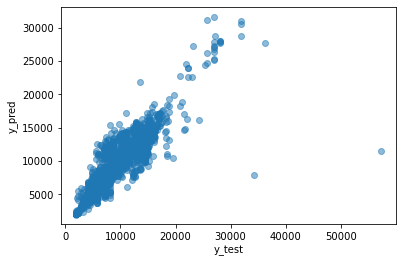

In [118]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [119]:
reg_rf.score(x_train, y_train)

0.9532498481338596

In [120]:
reg_rf.score(x_test, y_test)

0.7964759522413096

In [121]:
from sklearn import metrics

In [122]:
MAE_RanF = metrics.mean_absolute_error(y_test, y_pred)
MSE_RanF =  metrics.mean_squared_error(y_test, y_pred)
RMSE_RanF = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


In [123]:
#Model Accuracy before tuning

from sklearn.metrics import r2_score
R2_RanF = r2_score(y_test, y_pred)
R2_RanF

0.7964759522413096

#  5. KNN Regression

In [124]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor()

knn_regressor.fit(x_train,y_train)

KNeighborsRegressor()

In [125]:
ypred_knn = knn_regressor.predict(x_test)

In [126]:
MAE_knn = metrics.mean_absolute_error(y_test, ypred_knn)
MSE_knn =  metrics.mean_squared_error(y_test, ypred_knn)
RMSE_knn = np.sqrt(metrics.mean_squared_error(y_test, ypred_knn))


In [127]:
metrics.mean_squared_error(y_test, ypred_knn)

9257251.678334113

In [128]:
#Model Accuracy
from sklearn.metrics import r2_score
R2_knn = r2_score(y_test, ypred_knn)
R2_knn

0.570669349010061

# 6. Decision Tree

In [129]:
from sklearn.tree import DecisionTreeRegressor
des_tree = DecisionTreeRegressor()
des_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [130]:
ypred_decision = des_tree.predict(x_test)

In [131]:
MAE_dec = metrics.mean_absolute_error(y_test, ypred_decision)
MSE_dec =  metrics.mean_squared_error(y_test, ypred_decision)
RMSE_dec = np.sqrt(metrics.mean_squared_error(y_test, ypred_decision))


In [132]:
metrics.mean_squared_error(y_test, ypred_decision)

5758309.304784615

In [133]:
from sklearn.metrics import r2_score
R2_dec = r2_score(y_test, ypred_decision)
R2_dec

0.732942479223003

In [134]:
#tuning
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [135]:
ypred_tree =tree.predict(x_test)

In [136]:
#Model Accuracy after tuning
R2_tree = r2_score(y_test, ypred_tree)
R2_tree

0.7900154178604459

In [137]:
#List of MAE , MSE & R2 score

In [138]:
models = pd.DataFrame({
    'Model': [ 'LinearRegression', 'Ridge', 'Lasso', 'RandomForestRegressor', 'KNN', 'Decision Tree'],
    'MAE': [MAE_linReg, MAE_Ridge, MAE_Lass, MAE_RanF, MAE_knn, MAE_dec],
    'MSE':[MSE_linReg, MSE_Ridge, MSE_Lass, MSE_RanF,MSE_knn, MSE_dec ],
     'R2':[R2_linear, R2_Ridge, R2_Lasso, R2_RanF,R2_knn, R2_dec ]
})
   
   
models.sort_values(by='R2', ascending=False)

,Model,MAE,MSE,R2
3,RandomForestRegressor,1179.410367,4.388397e+06,0.796476
5,Decision Tree,1329.857706,5.758309e+06,0.732942
0,LinearRegression,1972.937286,8.202328e+06,0.619594
2,Lasso,1974.105261,8.214135e+06,0.619047
1,Ridge,1977.252713,8.225154e+06,0.618536
4,KNN,1889.934207,9.257252e+06,0.570669


# Hyper parameter tuning

In [139]:
#using RandomizedSearchCv

In [140]:
from sklearn.model_selection import RandomizedSearchCV

In [141]:
?RandomizedSearchCV

In [142]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]



In [143]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [144]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [145]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [146]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [147]:
prediction = rf_random.predict(x_test)

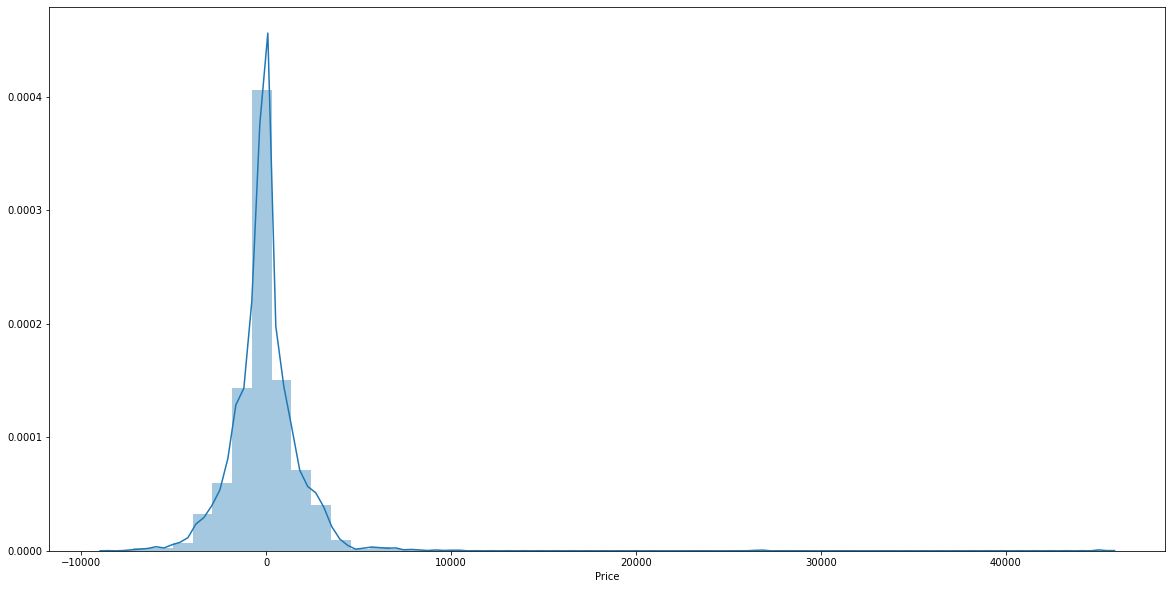

In [148]:
plt.figure(figsize = (20,10))
sns.distplot(y_test-prediction)
plt.show()

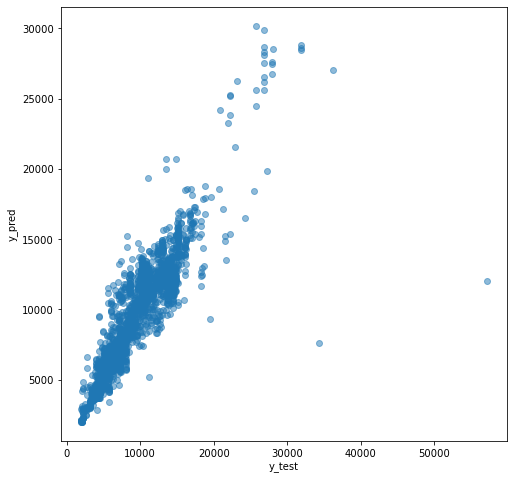

In [149]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [150]:
MAE_RF = print('MAE_RF:', metrics.mean_absolute_error(y_test, prediction))
MSE_RF = print('MSE_RF:', metrics.mean_squared_error(y_test, prediction))
RMSE_RF = print('RMSE_RF:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE_RF: 1164.28579765184
MSE_RF: 4055835.607882685
RMSE_RF: 2013.910526285288


In [151]:
#Model Accuracy

from sklearn.metrics import r2_score
R2_RF = r2_score(y_test, prediction)
R2_RF

0.8118994057474083

In [152]:
#END